## Stance detection analysis
4/26/2024 \
Author: Tayae Rogers, Sandy Liu

**Table of Contents**
1. [Data wrangling](#1)
2. [Side-by-side bar chart](#2)
3. [Statistical testing](#3)

Input: `female_data_scores.json`; `male_data_scores.json` \
Output: `female_politician_avg_scores.csv`; `male_politician_avg_scores.csv`; side-by-side boxplots -- by gender, gender and race, and gender and status in "The Squad"; mixed effects models -- for gender, race, and "The Squad"

<a class="anchor" id="1"></a>
### 1. Data wrangling

In [1]:
import pandas as pd
import json
from datetime import date

In [2]:
with open('female_data_scores.json') as inf:
    female_federal = json.load(inf)

with open('male_data_scores.json') as inf:
    male_federal = json.load(inf)

In [3]:
col_names_cats = ['SEXUALLY_EXPLICIT (exp.)', 'IDENTITY_ATTACK', 'THREAT', 'LIKELY_TO_REJECT (NYT)', 'SEVERE_TOXICITY', 'TOXICITY', 'INSULT', 'PROFANITY']

In [4]:
def flatten_datajson(d_json, gender, col_names_cats):
    """
    Input: d_json - a json of video scores for each video for politicians of the same gender; gender - gender of users
    Output: df - a df in which each row represents a video, the politician, the politican's gender, and the video's stance scores
    """
    # maybe make helper function to identify columns instead?
    col_names_basic = col_names_cats + ['video_id']
    col_name_politician = ['politician']
    df_vids = pd.DataFrame(columns=(col_names_basic + col_name_politician))

    # for each politician in the JSON...
    for politician in d_json.keys():
        df_pol_vids = pd.DataFrame(columns=col_names_basic)
        pol_json = d_json[politician]
        pol_json_length = len(pol_json)
        print(f"Processing {pol_json_length} videos from {politician}")

        # for each video for a politician...
        for vid in pol_json.keys(): 
            vid_dict = d_json[politician][vid] # video dictionary (dictionary for one video)
            vid_dict['video_id'] = vid # add key-value for video id
            vid_df = pd.DataFrame(vid_dict, index=['i',]) # convert video dictionary to df

            # add video df to df of a politician's videos if netiher are empty
            try:
                df_pol_vids = pd.concat([df_pol_vids if not df_pol_vids.empty else None, vid_df if not vid_df.empty else None], ignore_index=True) 
            except:
                print(f"{vid_dict['video_id']} failed to add to dict")
        
        df_pol_vids['politician'] = politician

        # add video df to df of a politician's videos if netiher are empty
        try:
            df_vids = pd.concat([df_vids if not df_vids.empty else None, df_pol_vids if not df_pol_vids.empty else None], ignore_index=True) # add video df to df of a user's videos if netiher are empty
        except:
            print(f"{df_pol_vids['politician']} failed to add to dict")
        
    df_vids.loc[:, 'gender'] = gender

    return df_vids


In [5]:
def datajson_to_csv(d_json, gender, col_names):
    """
    Input: d_json - a json of video scores for each video for politicians of the same gender; gender - gender of users
    Output: df - a df in which each row represents a video, the politician, the politican's gender, and the video's stance scores

    Converts json of video scores to a df and writes to a CSV
    """
    df_temp = flatten_datajson(d_json, gender, col_names)
    print(df_temp.shape)

    df_temp = df_temp.rename(columns={"SEXUALLY_EXPLICIT":"SEXUALLY_EXPLICIT (exp.)", "LIKELY_TO_REJECT":"LIKELY_TO_REJECT (NYT)"})

    df_temp.to_csv(f"{gender}_politician_avg_scores.csv", index=False)
    return df_temp

In [7]:
df_female_federal = datajson_to_csv(female_federal, 'female', col_names_cats)
df_female_federal.head()

Processing 35 videos from repstansbury
Processing 3 videos from nikemawilliams
Processing 12 videos from marieforcongress
Processing 6 videos from repchrissyhoulahan
Processing 35 videos from teampattymurray
Processing 27 videos from reppressley
Processing 82 videos from sheilaforhouston
Processing 73 videos from kirstengillibrand
Processing 56 videos from repsummerlee
Processing 12 videos from aoc
Processing 8 videos from repwilson
Processing 35 videos from repkatieporter
Processing 27 videos from ilhanmn
Processing 5 videos from rashidatlaib
(416, 11)


,SEXUALLY_EXPLICIT (exp.),IDENTITY_ATTACK,THREAT,LIKELY_TO_REJECT (NYT),SEVERE_TOXICITY,TOXICITY,INSULT,PROFANITY,video_id,politician,gender
0,0.013974,0.013107,0.011632,0.610315,0.002965,0.077061,0.048861,0.037440,7283952208561933599,repstansbury,female
1,0.012494,0.016964,0.020177,0.541285,0.003706,0.106122,0.070999,0.038277,7278392468788366634,repstansbury,female
2,0.017342,0.009211,0.014558,0.653652,0.002619,0.060097,0.031545,0.029814,7257715712897125675,repstansbury,female
3,0.022552,0.026196,0.009013,0.661436,0.002877,0.073434,0.039933,0.032210,7357176379433094442,repstansbury,female
4,0.014709,0.004421,0.008187,0.555669,0.001492,0.020409,0.009793,0.017375,7356391987936873771,repstansbury,female


In [8]:
df_male_federal = datajson_to_csv(male_federal, 'male', col_names_cats)
df_male_federal.head()

Processing 30 videos from wileynickel
Processing 35 videos from corybooker
Processing 103 videos from jeffjacksonnc
Processing 67 videos from greglandsmanoh
Processing 15 videos from kevinmullinforcongress
Processing 23 videos from repdeanphillips
Processing 4 videos from repres
Processing 33 videos from robertgarcia
Processing 11 videos from jon
Processing 131 videos from bernie
Processing 33 videos from repbowman
Processing 8 videos from troyc4congress
Processing 50 videos from billpascrell
Processing 39 videos from repcasar
Processing 35 videos from repmaxwellfrost
Processing 99 videos from colinallredtx
Processing 50 videos from congressmancardenas
Processing 3 videos from repmarktakano
Processing 64 videos from johnfetterman
Processing 13 videos from stevenahorsford
Processing 18 videos from repmarkpocan
(864, 11)


,LIKELY_TO_REJECT (NYT),SEVERE_TOXICITY,TOXICITY,SEXUALLY_EXPLICIT (exp.),IDENTITY_ATTACK,INSULT,THREAT,PROFANITY,video_id,politician,gender
0,0.666542,0.011399,0.198919,0.016710,0.094777,0.144321,0.019813,0.068710,7359310165461568798,wileynickel,male
1,0.703659,0.054225,0.516599,0.022714,0.089009,0.530690,0.010222,0.186975,7345476833854508319,wileynickel,male
2,0.543666,0.007673,0.287499,0.019656,0.016240,0.264292,0.035680,0.050969,7345202286848642347,wileynickel,male
3,0.879230,0.001383,0.015833,0.011324,0.002664,0.008349,0.007573,0.016104,7344046721384582431,wileynickel,male
4,0.653939,0.001793,0.061445,0.006370,0.005217,0.022126,0.008609,0.014532,7342664318766370079,wileynickel,male


<a class="anchor" id="2"></a>
### 2. Side-by-side bar chart

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
def plot_side_by_side(multi_poli_df, identify, categories, title, ylim, palette_in):
    """
    Input: multi_poli_df - df with columns for each stance, identify - string identifying feature in the df by which you want to plot
    """
    long =  pd.melt(multi_poli_df, id_vars=[identify], value_vars=categories)
    
    plt.figure(figsize=(15,8))
    ax = sns.boxplot(x="variable", y="value", hue=identify, data=long, palette=palette_in)  # RUN PLOT   
    ax.set_xticklabels(ax.get_xticklabels()) # rotation = 90
    ax.set_xlabel("Attribute")
    ax.set_ylabel("Probability")
    plt.title(title)
    plt.ylim(0, ylim)
    
    #plt.rc('font', size=20)
    plt.rc('axes', titlesize=15) # axes title
    plt.rc('axes', labelsize=15) # x and y labels
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    plt.rc('legend', fontsize=12)
    plt.rc('figure', titlesize=12)  # fontsize of the figure title

    plt.show()

    plt.clf()
    plt.close()

#### Analysis by gender

##### Visualization

In [43]:
palette = sns.color_palette('PRGn')
gen_palette = [palette[0], palette[5]]
df_all_federal = pd.concat([df_female_federal, df_male_federal])

/var/folders/79/rqxxrf3n6zq58_z0ng_2hbhm0000gn/T/ipykernel_22891/416873037.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels()) # rotation = 90


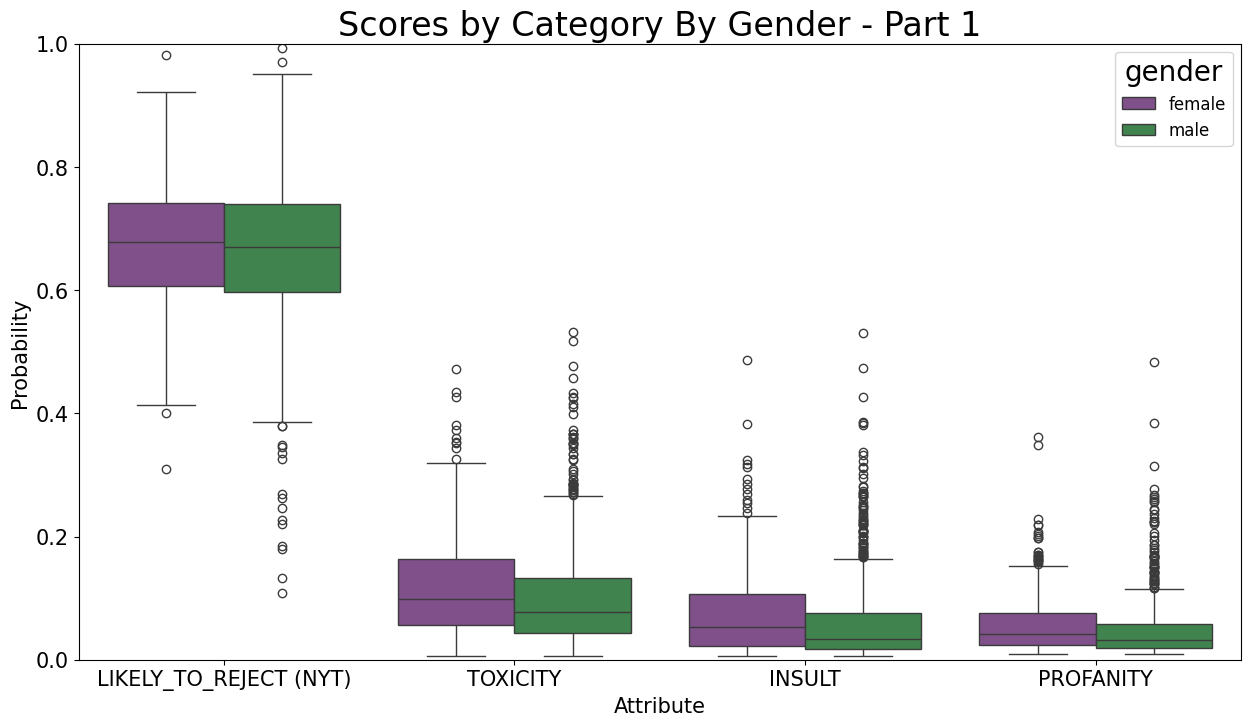

In [57]:
plot_side_by_side(df_all_federal, 'gender', ['LIKELY_TO_REJECT (NYT)', 'TOXICITY', 'INSULT', 'PROFANITY'], 'Scores by Category By Gender - Part 1', 1, gen_palette)

/var/folders/79/rqxxrf3n6zq58_z0ng_2hbhm0000gn/T/ipykernel_22891/416873037.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels()) # rotation = 90


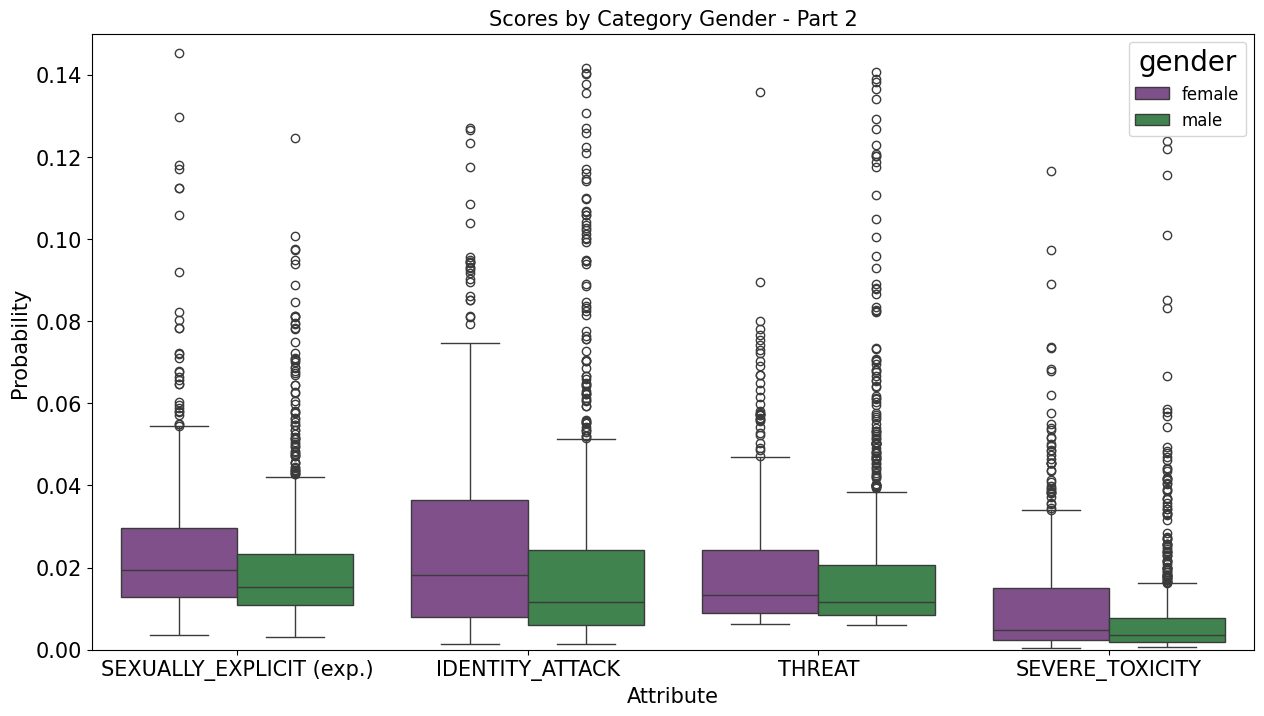

In [58]:
plot_side_by_side(df_all_federal, 'gender', ['SEXUALLY_EXPLICIT (exp.)', 'IDENTITY_ATTACK', 'THREAT', 'SEVERE_TOXICITY'], 'Scores by Category Gender - Part 2', 0.15, gen_palette)

#### Analysis by gender x race

##### Data (assigning race)

In [59]:
male_white = ['wileynickel', 'jeffjacksonnc', 'greglandsmanoh', 'kevinmullinforcongress', 'repdeanphillips', 'jon', 'bernie', 'billpascrell', 'johnfetterman', 'repmarkpocan']
male_poc = ['corybooker', 'robertgarcia', 'repbowman', 'troyc4congress', 'repcasar', 'repmaxwellfrost', 'colinallredtx', 'congressmancardenas', 'repmarktakano', 'stevenahorsford'] # includes hispanics/latinos

fem_white = ['repstansbury', 'repchrissyhoulahan', 'teampattymurray', 'kirstengillibrand', 'repkatieporter']
fem_poc = ['nikemawilliams', 'marieforcongress', 'reppressley', 'sheilaforhouston', 'repsummerlee', 'aoc', 'repwilson', 'ilhanmn', 'rashidatlaib'] # includes hispanics/latinos

In [60]:
def assign_race(df_gender, gender):
    """
    Input: df_gender - df with columns for each stance, gender - string gender "male" or "female"
    """
    if gender == 'female':
        poc_list = ['nikemawilliams', 'marieforcongress', 'reppressley', 'sheilaforhouston', 'repsummerlee', 'aoc', 'repwilson', 'ilhanmn', 'rashidatlaib'] # includes hispanics/latinos
    elif gender == 'male':
        poc_list = ['corybooker', 'robertgarcia', 'repbowman', 'troyc4congress', 'repcasar', 'repmaxwellfrost', 'colinallredtx', 'congressmancardenas', 'repmarktakano', 'stevenahorsford']

    df_gender['race'] = df_gender['politician'].apply(lambda x: 'non-white' if x in poc_list else 'white')

    return df_gender

In [61]:
def assign_combo_crit(crit1, crit2):
    return f"{crit1}_{crit2}"

In [62]:
df_female_federal = assign_race(df_female_federal, "female")

In [63]:
df_male_federal = assign_race(df_male_federal, 'male')

In [64]:
df_all_federal = pd.concat([df_female_federal, df_male_federal])
df_all_federal['gender-race'] = df_all_federal.apply(lambda x: assign_combo_crit(x.gender, x.race), axis=1)

##### Visualization

In [65]:
palette = sns.color_palette('PRGn')
race_gen_palette = [palette[1], palette[0], palette[4], palette[5]] # make palette for race-gen

/var/folders/79/rqxxrf3n6zq58_z0ng_2hbhm0000gn/T/ipykernel_22891/416873037.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels()) # rotation = 90


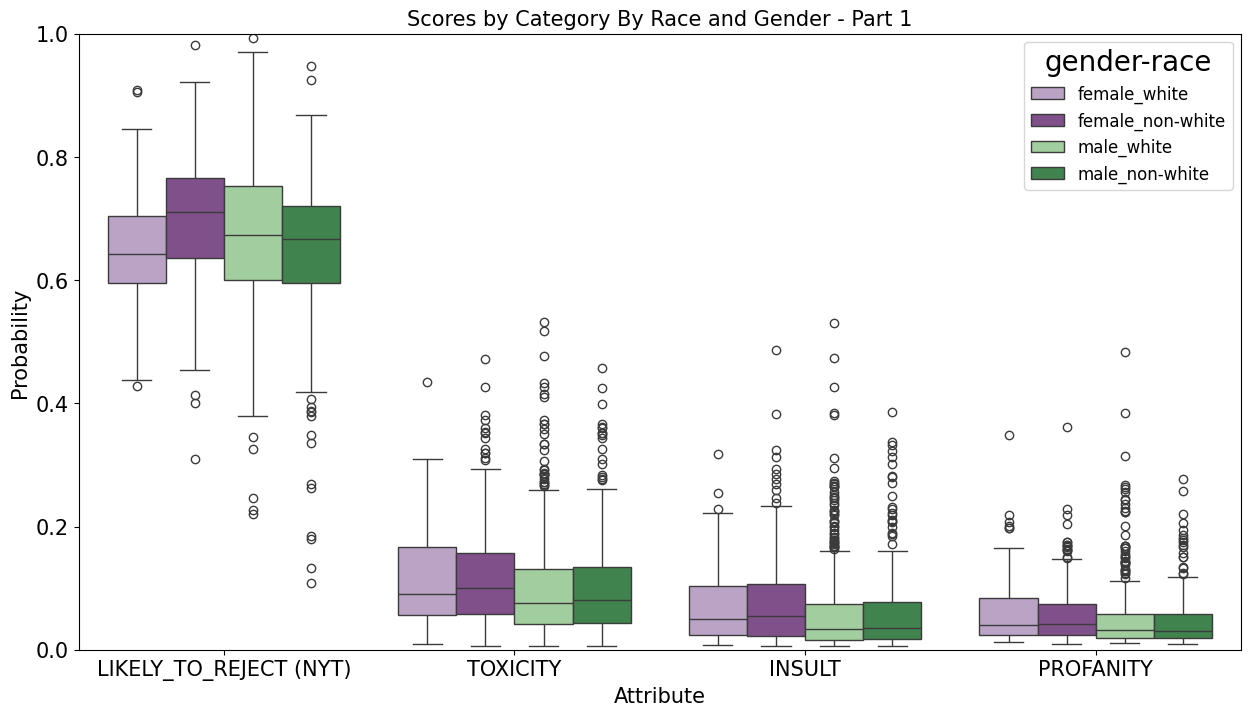

In [66]:
plot_side_by_side(df_all_federal, 'gender-race', ['LIKELY_TO_REJECT (NYT)', 'TOXICITY', 'INSULT', 'PROFANITY'], 'Scores by Category By Race and Gender - Part 1', 1, race_gen_palette)

/var/folders/79/rqxxrf3n6zq58_z0ng_2hbhm0000gn/T/ipykernel_22891/416873037.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels()) # rotation = 90


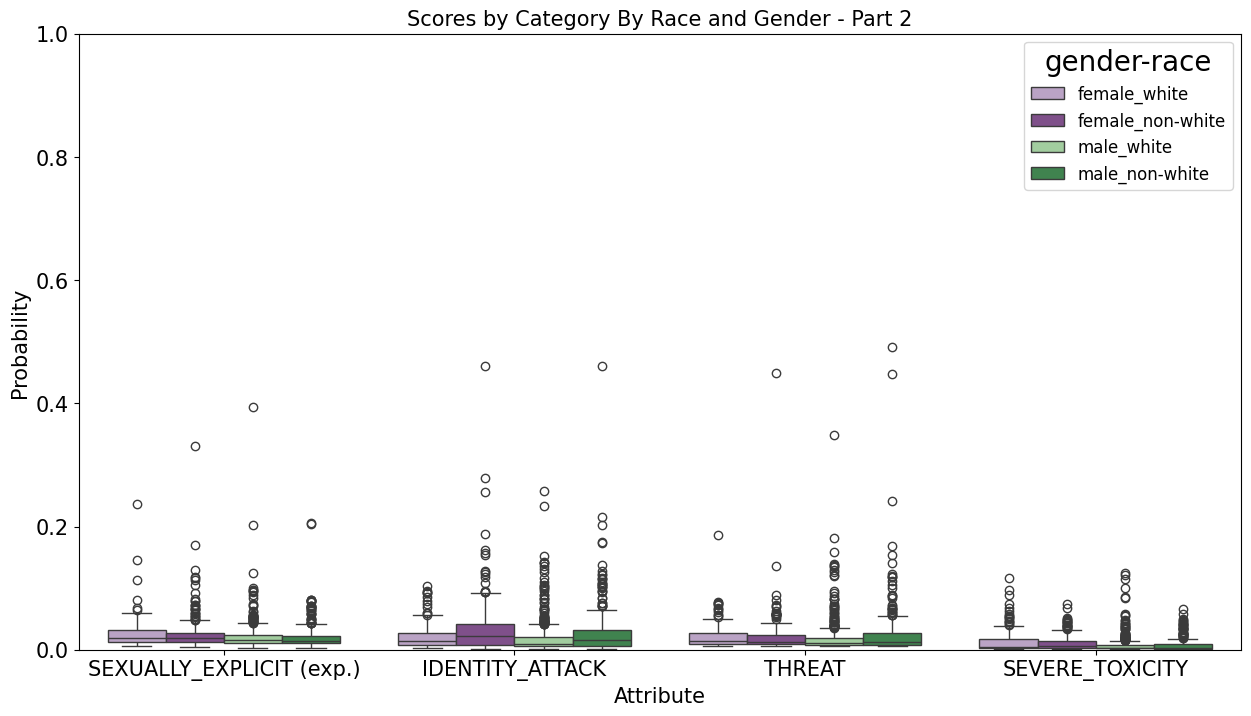

In [67]:
plot_side_by_side(df_all_federal, 'gender-race', ['SEXUALLY_EXPLICIT (exp.)', 'IDENTITY_ATTACK', 'THREAT', 'SEVERE_TOXICITY'], 'Scores by Category By Race and Gender - Part 2', 1, race_gen_palette)

/var/folders/79/rqxxrf3n6zq58_z0ng_2hbhm0000gn/T/ipykernel_22891/416873037.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels()) # rotation = 90


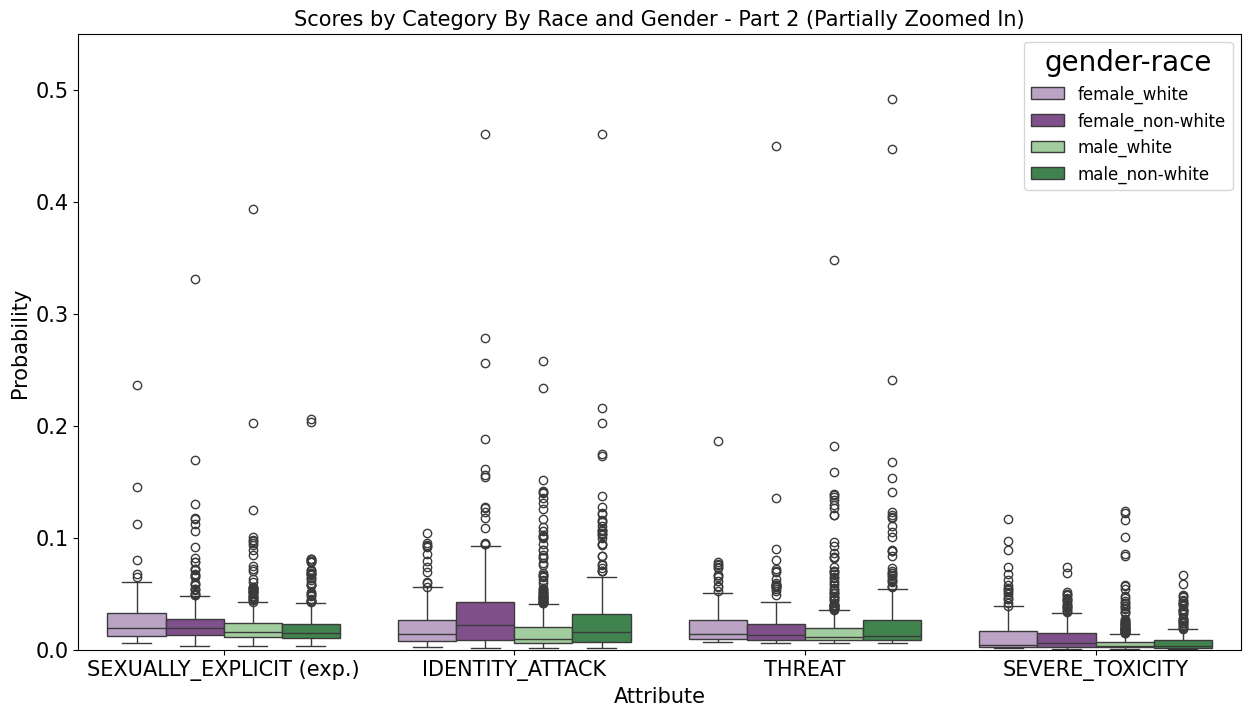

In [68]:
plot_side_by_side(df_all_federal, 'gender-race', ['SEXUALLY_EXPLICIT (exp.)', 'IDENTITY_ATTACK', 'THREAT', 'SEVERE_TOXICITY'], 'Scores by Category By Race and Gender - Part 2 (Partially Zoomed In)', 0.55, race_gen_palette)

/var/folders/79/rqxxrf3n6zq58_z0ng_2hbhm0000gn/T/ipykernel_22891/416873037.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels()) # rotation = 90


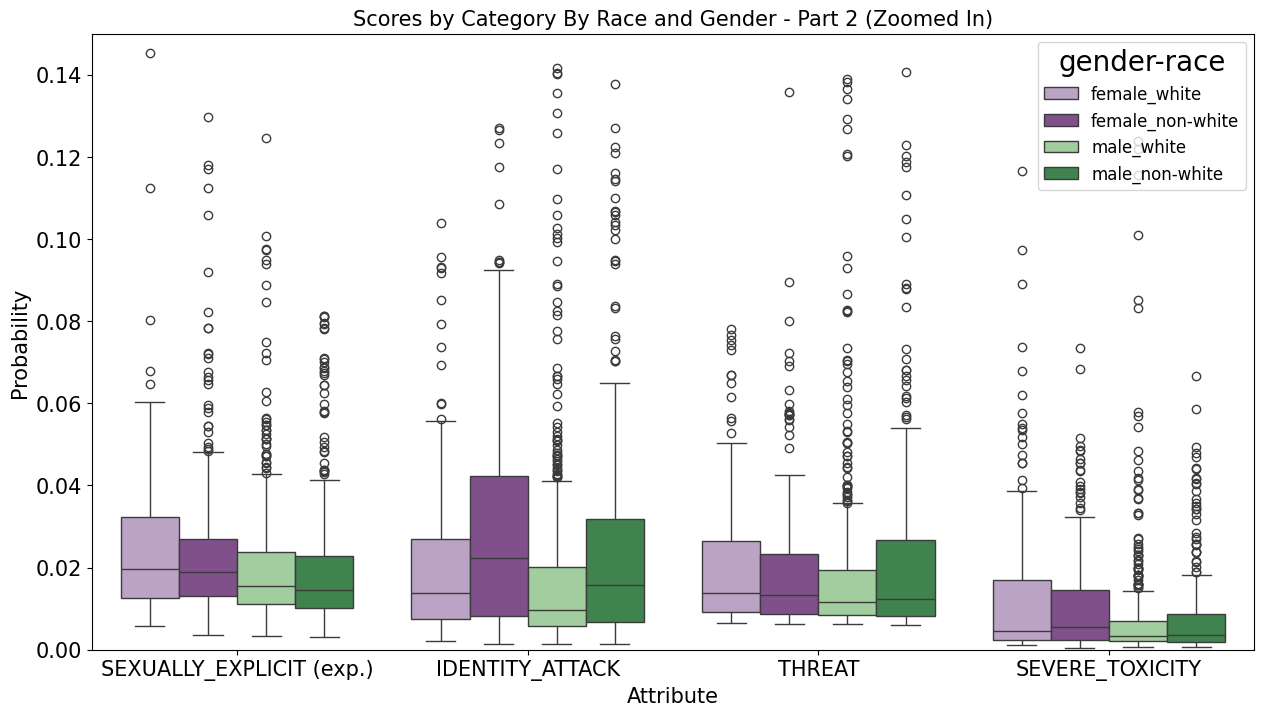

In [69]:
plot_side_by_side(df_all_federal, 'gender-race', ['SEXUALLY_EXPLICIT (exp.)', 'IDENTITY_ATTACK', 'THREAT', 'SEVERE_TOXICITY'], 'Scores by Category By Race and Gender - Part 2 (Zoomed In)', 0.15, race_gen_palette)

#### Analysis by gender x "Squad"

##### Data (assigning "Squad")

In [70]:
def assign_squad(df_gender, gender):
    """
    Input: df_gender - df with columns for each stance, gender - string gender "male" or "female"
    """
    if gender == 'female':
        squad_list = ['reppressley', 'repsummerlee', 'aoc', 'ilhanmn', 'rashidatlaib'] # includes hispanics/latinos
    elif gender == 'male':
        squad_list = ['repbowman', 'repcasar']

    df_gender['squad'] = df_gender['politician'].apply(lambda x: "sqaud" if x in squad_list else "non-squad")

    return df_gender

In [71]:
df_female_federal_squad = assign_squad(df_female_federal, 'female')
df_male_federal_squad = assign_squad(df_male_federal, 'male')

In [72]:
df_all_federal_squad = pd.concat([df_female_federal_squad, df_male_federal_squad])

In [73]:
df_all_federal_squad['gender-squad'] = df_all_federal_squad.apply(lambda x: assign_combo_crit(x.gender, x.squad), axis=1)

##### Visualization

In [74]:
palette2 = sns.color_palette(palette='Paired')
gen_squad_palette = [palette2[0], palette2[1], palette2[4], palette2[5]] # make palette for gen-squad

/var/folders/79/rqxxrf3n6zq58_z0ng_2hbhm0000gn/T/ipykernel_22891/416873037.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels()) # rotation = 90


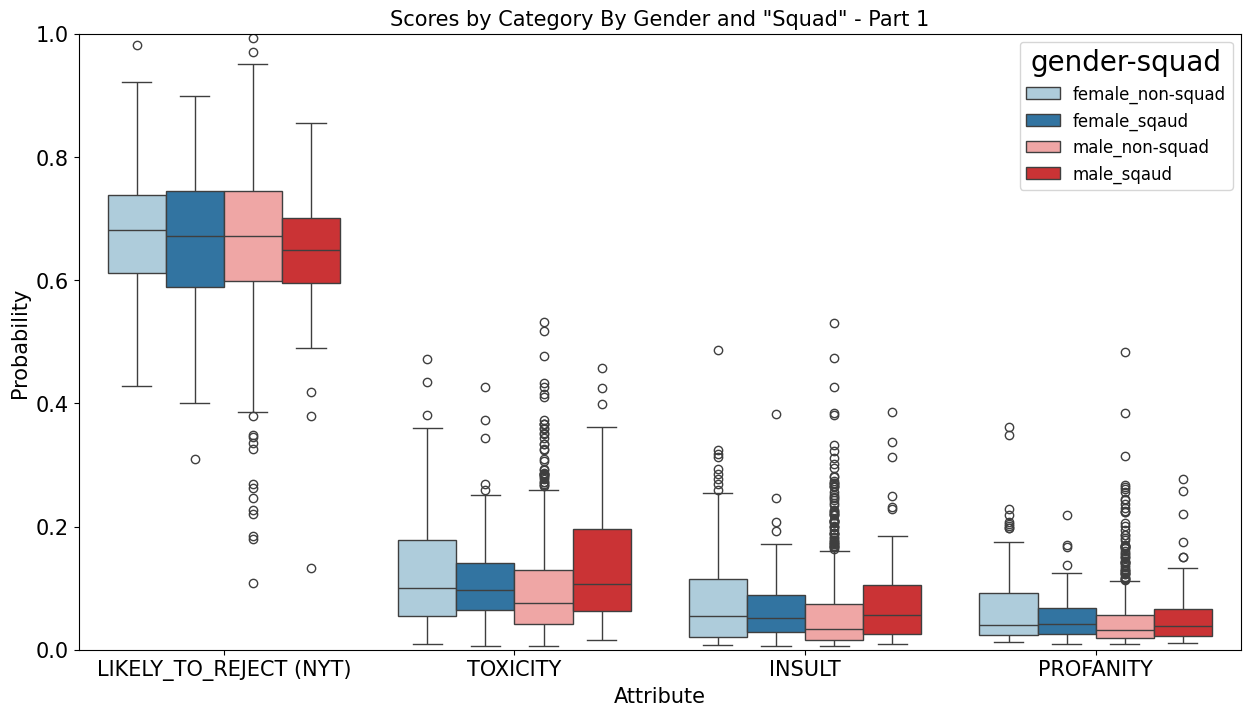

In [75]:
plot_side_by_side(df_all_federal_squad, 'gender-squad', ['LIKELY_TO_REJECT (NYT)', 'TOXICITY', 'INSULT', 'PROFANITY'], 'Scores by Category By Gender and "Squad" - Part 1', 1, gen_squad_palette)

/var/folders/79/rqxxrf3n6zq58_z0ng_2hbhm0000gn/T/ipykernel_22891/416873037.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels()) # rotation = 90


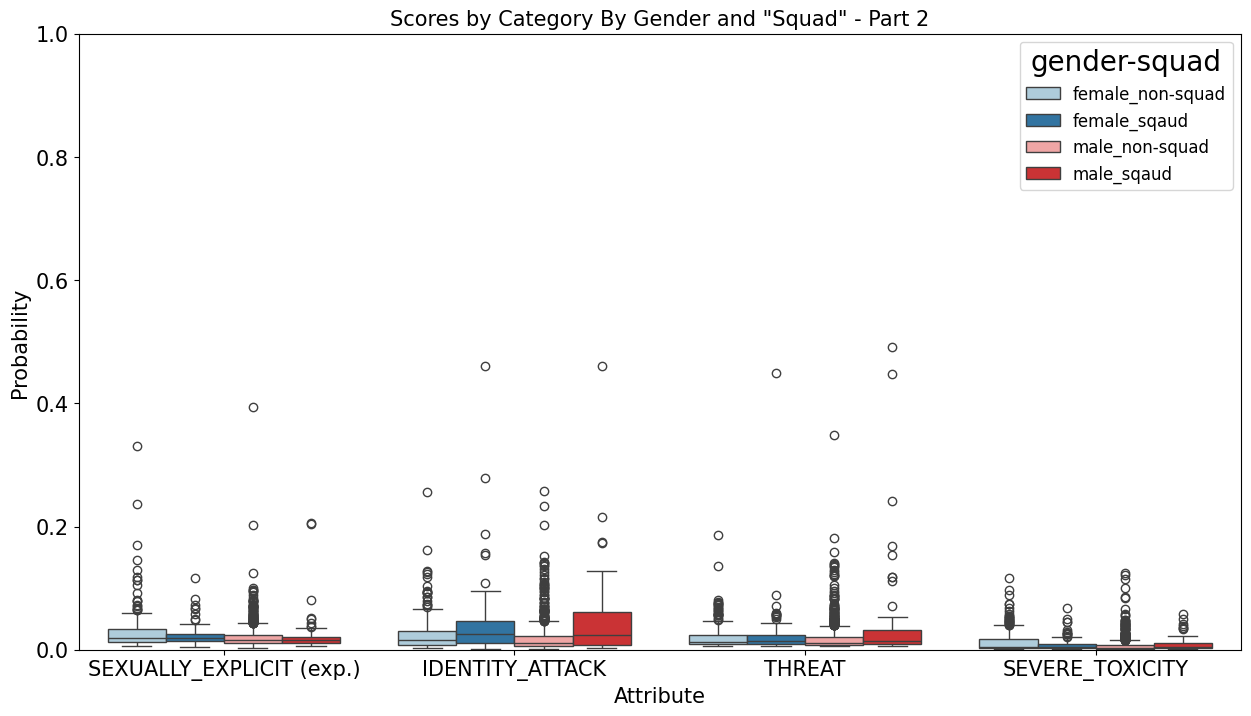

In [76]:
plot_side_by_side(df_all_federal_squad, 'gender-squad', ['SEXUALLY_EXPLICIT (exp.)', 'IDENTITY_ATTACK', 'THREAT', 'SEVERE_TOXICITY'], 'Scores by Category By Gender and "Squad" - Part 2', 1, gen_squad_palette)

/var/folders/79/rqxxrf3n6zq58_z0ng_2hbhm0000gn/T/ipykernel_22891/416873037.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels()) # rotation = 90


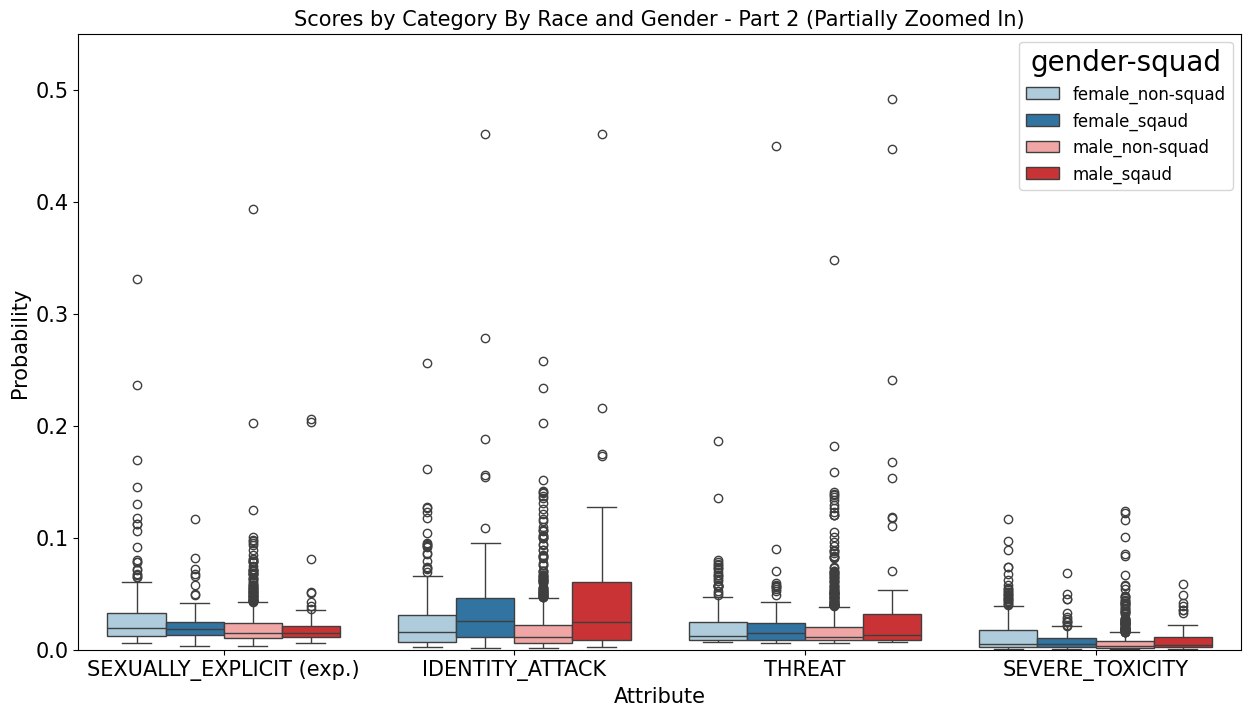

In [77]:
plot_side_by_side(df_all_federal_squad, 'gender-squad', ['SEXUALLY_EXPLICIT (exp.)', 'IDENTITY_ATTACK', 'THREAT', 'SEVERE_TOXICITY'], 'Scores by Category By Race and Gender - Part 2 (Partially Zoomed In)', 0.55, gen_squad_palette)

/var/folders/79/rqxxrf3n6zq58_z0ng_2hbhm0000gn/T/ipykernel_22891/416873037.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels()) # rotation = 90


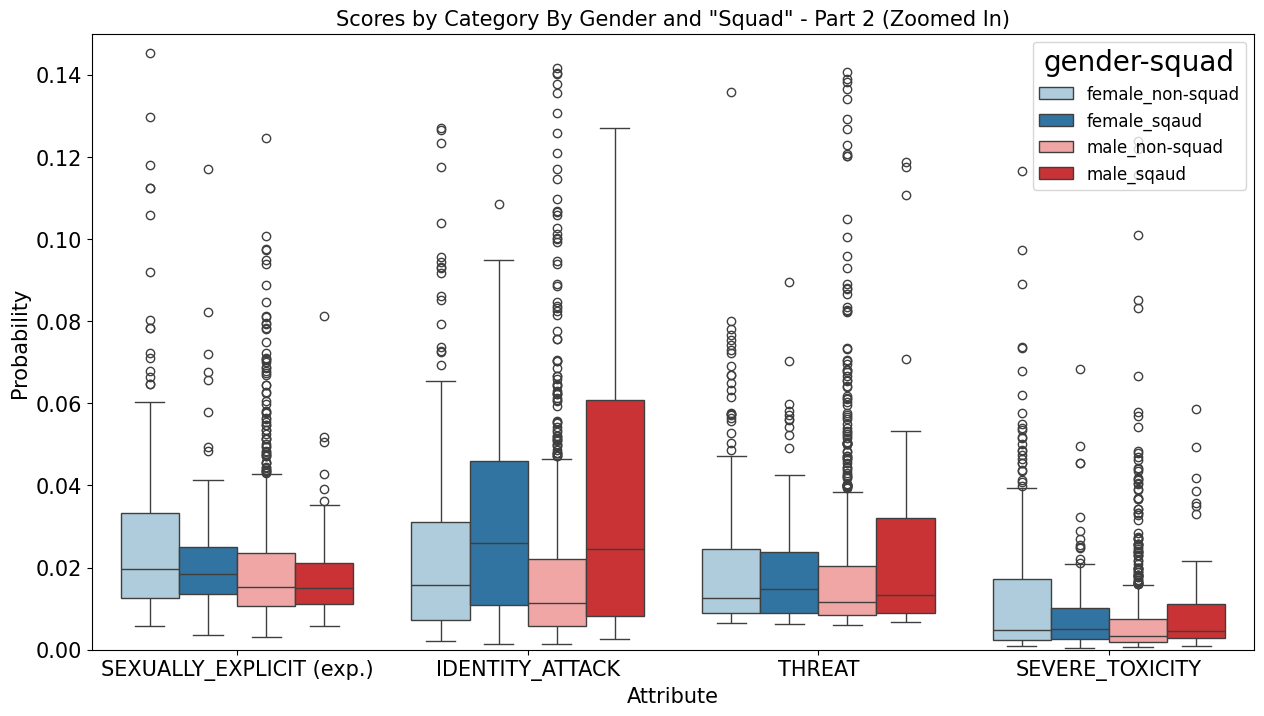

In [78]:
plot_side_by_side(df_all_federal_squad, 'gender-squad', ['SEXUALLY_EXPLICIT (exp.)', 'IDENTITY_ATTACK', 'THREAT', 'SEVERE_TOXICITY'], 'Scores by Category By Gender and "Squad" - Part 2 (Zoomed In)', 0.15, gen_squad_palette)

<a class="anchor" id="3"></a>
### 3. Statistical Testing

In [152]:
import statsmodels.formula.api as smf

#### Analysis by gender x race

In [153]:
df_all_federal_edit = df_all_federal.rename(columns={"LIKELY_TO_REJECT (NYT)": "LIKELY_TO_REJECT", "SEXUALLY_EXPLICIT (exp.)": "SEXUALLY_EXPLICIT"})
# df_all_federal_edit

In [154]:
def assign_squad(df_gender, gender):
    """
    Input: df_gender - df with columns for each stance, gender - string gender "male" or "female"
    """
    if gender == 'female':
        squad_list = ['reppressley', 'repsummerlee', 'aoc', 'ilhanmn', 'rashidatlaib'] # includes hispanics/latinos
    elif gender == 'male':
        squad_list = ['repbowman', 'repcasar']

    df_gender['squad'] = df_gender['politician'].apply(lambda x: "sqaud" if x in squad_list else "non-squad")

    return df_gender

In [155]:
df_all_federal_edit['race'].unique()

array(['white', 'non-white'], dtype=object)

In [156]:
df_all_federal_edit['gender_male'] = df_all_federal_edit['gender'].apply(lambda x: 'male' if x == 'male' else 'nonmale')
df_all_federal_edit['gender_female'] = df_all_federal_edit['gender'].apply(lambda x: 'female' if x == 'female' else 'nonfemale')

df_all_federal_edit['race_white'] = df_all_federal_edit['race'].apply(lambda x: 'white' if x == 'white' else 'non-white')
df_all_federal_edit['race_nonwhite'] = df_all_federal_edit['race'].apply(lambda x: 'non-white' if x == 'non-white' else 'white')

# Mixed Effect Models
Sorry that this code is not complete because the more complete version that gives p-value for all attributes in a list (the one we showed on our slides) is gone after some merging problems. But the idea is that we took the p-values of all attribtes in a list for gender, race, and squad, and used the data to perform out analysis. 

In [158]:
# Fit the mixed-effects model
md = smf.mixedlm("LIKELY_TO_REJECT ~ gender", df_all_federal_edit, groups=df_all_federal_edit["politician"])
mdf = md.fit()

# Print the summary of the model to get the p-values
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: LIKELY_TO_REJECT
No. Observations: 1280    Method:             REML            
No. Groups:       35      Scale:              0.0092          
Min. group size:  3       Log-Likelihood:     1136.5120       
Max. group size:  131     Converged:          Yes             
Mean group size:  36.6                                        
---------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept        0.677     0.016  41.594  0.000   0.646   0.709
gender[T.male]  -0.017     0.021  -0.806  0.420  -0.058   0.024
Group Var        0.003     0.009                               



/Users/sandyliu/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [179]:
import statsmodels.formula.api as smf

# Fit the mixed-effects model
md = smf.mixedlm("SEXUALLY_EXPLICI ~ race", df_combined, groups=df_combined["politician"])
mdf = md.fit()

# Print the summary of the model to get the p-values
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SEXUALLY_EXPLICI
No. Observations: 1280    Method:             REML            
No. Groups:       35      Scale:              0.0006          
Min. group size:  3       Log-Likelihood:     2937.7364       
Max. group size:  131     Converged:          Yes             
Mean group size:  36.6                                        
---------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept        0.023     0.002  11.188  0.000   0.019   0.027
race[T.white]    0.000     0.003   0.163  0.870  -0.005   0.006
Group Var        0.000     0.001                               



/Users/sandyliu/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


### CODE GRAVEYARD

In [159]:
df_all_federal_squad_edit = df_all_federal_squad.rename(columns={"LIKELY_TO_REJECT (NYT)": "LIKELY_TO_REJECT", "SEXUALLY_EXPLICIT (exp.)": "SEXUALLY_EXPLICIT"})
# df_all_federal_squad

In [160]:
# Fit the mixed-effects model
md = smf.mixedlm("LIKELY_TO_REJECT ~ gender", df_all_federal, groups=df_all_federal["politician"])
mdf = md.fit()

# Print the summary of the model to get the p-values
print(mdf.summary())

PatsyError: Error evaluating factor: NameError: name 'LIKELY_TO_REJECT' is not defined
    LIKELY_TO_REJECT ~ gender
    ^^^^^^^^^^^^^^^^

In [182]:
import statsmodels.formula.api as smf

# Assuming 'df' is your combined DataFrame
results = {}

for dependent_var in ['LIKELY_TO_REJECT', 'SEVERE_TOXICITY', 'TOXICITY', 'SEXUALLY_EXPLICI', 
                      'IDENTITY_ATTACK', 'INSULT', 'THREAT', 'PROFANITY']:
    # Fit the mixed-effects model with 'gender' as a fixed effect and 'politician' as a random effect
    model = smf.mixedlm(f"{dependent_var} ~ race", df_combined, groups=df_combined["politician"])
    result = model.fit()
    # Store the p-value of the 'gender' coefficient
    results[dependent_var] = result.pvalues['race[T.white]']

# Now 'results' dictionary contains the dependent variable names as keys and their respective p-values as values


/Users/sandyliu/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/sandyliu/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/sandyliu/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/sandyliu/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/sandyliu/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: C

In [183]:
results #race

{'LIKELY_TO_REJECT': 0.8721037558347587,
 'SEVERE_TOXICITY': 0.9458017527623,
 'TOXICITY': 0.9262367389383354,
 'SEXUALLY_EXPLICI': 0.8703793517916025,
 'IDENTITY_ATTACK': 0.019171340569088924,
 'INSULT': 0.8768964743126973,
 'THREAT': 0.5407097077513008,
 'PROFANITY': 0.7004166919191577}